# Loading data

## The Mnist Data Set

In [3]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [336]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"



def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]




def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
    
    
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
num_train = 60000
    
X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]


import numpy as np

shuffle_index = np.random.permutation(num_train)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Iris Data Set

In [251]:
iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [252]:
X = iris.data[:, 2:]
y = iris.target.astype(np.int)

In [253]:
num_train = round(150 * 0.8)  #edit this to change the training/validating set vs test set number

shuffle_index = np.random.permutation(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]

## Model designing

In [230]:
def OneHotEncodeInt(y, n=None):
    if not n:
        n = y.max()+1
    encoded_y = np.zeros((y.shape[0], n))
    encoded_y[np.arange(y.shape[0]), y.astype(int)] = 1
    return np.array(encoded_y)

In [231]:
def Sigmoid(x):
    """
    I honestly dont know why I wrote this function
    """
    return 1 / (1 + np.exp(-x))

In [232]:
def SoftMax(Z):
    """
    The world, mudamudamudamuda
    """
    exp_Z = np.exp(Z)
    s = np.sum(exp_Z, axis=1, keepdims=True)
    return exp_Z/s

In [233]:
def CrossEntropy(y, y_pred, loss=None, theta=None, alpha=0.1, bias=True, epsilon=1e-7):
    """
    omeriwa, sindeyilu.
    nani
    """
    if loss is None:
        return (-y*np.log(y_pred + epsilon)).sum(axis=1).mean()
    elif loss == "l2":
        if theta is None:
            raise RuntimeError("Must provide theta to calculate l2 loss")
        sm_loss = -(y*np.log(y_pred + epsilon)).sum(axis=1).mean()
        if bias:
#             l2_loss = 1/2*alpha*(theta[:, 1:] ** 2).sum()
            l2_loss = 1/2*alpha*np.sum(np.square(theta[:, 1:]))
        else:
            l2_loss = 1/2*alpha*np.sum(np.square(theta))
#             l2_loss = 1/2*alpha*(theta ** 2).sum()
        return sm_loss + l2_loss
    else:
        raise RuntimeError("Parameter loss={} not recognized.".format(loss))    

#     loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))

In [234]:
def SoftMaxGradient(X, y, y_pred, loss=None, theta=None, alpha=0.1, bias=True):
    m = y.shape[0]
    gradient = 2/m * (y_pred-y).T.dot(X)
    if loss is None:
        return gradient
    elif loss == "l2":
        if theta is None:
            raise RuntimeError("Must provide theta to calculate l2 gradient")
        if not bias:
            return gradient + alpha * theta
        else:
            return gradient + alpha * np.concatenate([np.zeros((theta.shape[0], 1)), theta[:, 1:]], axis=1)
    else:
        raise RuntimeError("Parameter loss={} not recognized.".format(loss))

# Two alternative ways

#     ncls = y.shape[1]
#     n = X.shape[1]
#     m = y.shape[0]
#     d = np.zeros([ncls, n])
#     for k in range(ncls):
#         for i in range(m):
#             d[k, :] += (y_pred[i][k] - y[i][k])*X[i]/m
#     return d

#

#     X = np.dstack([X for i in range(y.shape[1])])
#     return ((np.swapaxes(X, 0, 1) * (y_pred - y)).sum(axis = 1)/y.shape[0]).T
#     The above is an alternative way to achieve the same goal via 3-D array

In [243]:
def PrepDataSet(X, y=None, features=None, bias=True, norm=True):
    if norm:
        X = StandardScaler().fit_transform(X)
    
    # If don't want bias term then use the original data
    if bias:
        X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], 1)
    if y is not None:
        if not features:
            # If features is not specified, then regard the number of categories as maximum of y + 1
            features = y.max()+1
        y = OneHotEncodeInt(y, features)
        return X, y
    return X

In [244]:
def BGDWtihEarlyStopping(X, y, features, learning_rate=0.05, loss="l2", t=50, bias=True, 
                         tol=1e-3, alpha=0.1, t_size=0.2, verbose_iter=500, norm=True):
    
    X, y = PrepDataSet(X, y, features, bias, norm)

    # Split data using Stratified Shuffle Split algorithm
    sss = StratifiedShuffleSplit(n_splits=1, test_size=t_size)
    train_index, test_index = next(sss.split(X, y))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize theta for calculation
    theta = np.random.rand(features, X.shape[1]) + 1e-3

    # Initialize iteration information storage items
    loss_train_rec = []
    loss_test_rec = []
    best_theta = theta
    min_loss     = np.inf
    c            = 0
    i            = 0
    
    # while the test(validation) set hasn't became worse in classification
    while c < t:
        i += 1
        y_pred_train = SoftMax(X_train.dot(theta.T))
        y_pred_test = SoftMax(X_test.dot(theta.T))
        loss_train = CrossEntropy(y_train, y_pred_train, loss, theta, alpha)
        loss_test = CrossEntropy(y_test, y_pred_test, loss, theta, alpha)
        loss_train_rec.append(loss_train)
        loss_test_rec.append(loss_test)
        if loss_test < min_loss - tol:
            best_theta = theta
            min_loss = loss_test
            c = 0
        else:
            c += 1
        if not i%verbose_iter:
            print("i={:5}  |  c={:2}  |  min_loss={:2.10f}  |  loss_test={:2.10f}".format(i, c, min_loss, 
                                                                                          loss_test))
        dtheta = SoftMaxGradient(X_train, y_train, y_pred_train, loss, theta, alpha)
        theta -= learning_rate * dtheta


    plt.figure(figsize=(15, 15))
    plt.plot(range(1,i+1), loss_train_rec, "r-*", label="train loss")
    plt.plot(range(1,i+1), loss_test_rec, "b-o", label="test loss")
    plt.xlabel("Iterations")
    plt.ylabel("Losses")
    plt.legend(loc="best", fontsize=15)
    plt.axis([0, i, 0, max(max(loss_test_rec), max(loss_train_rec))])
    plt.show()
    return theta

## Testing

In [219]:
from sklearn.metrics import accuracy_score

### For MNIST data set

In [392]:
theta = BGDWtihEarlyStopping(X_train[:2000], y_train[:2000], 10, 0.05)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 

KeyboardInterrupt: 

In [210]:
X_test_pr = PrepDataSet(X_test)

y_pred_score = SoftMax(X_test_pr.dot(theta.T))
y_pred = np.argmax(y_pred_score, axis=1).reshape(-1)
y_pred

array([0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1])

In [350]:
accuracy_score(y_test, y_pred)

0.61519999999999997

### Test Graph for iris set

i=  500  |  c= 0  |  min_loss=0.5603928107  |  loss_test=0.5603928107


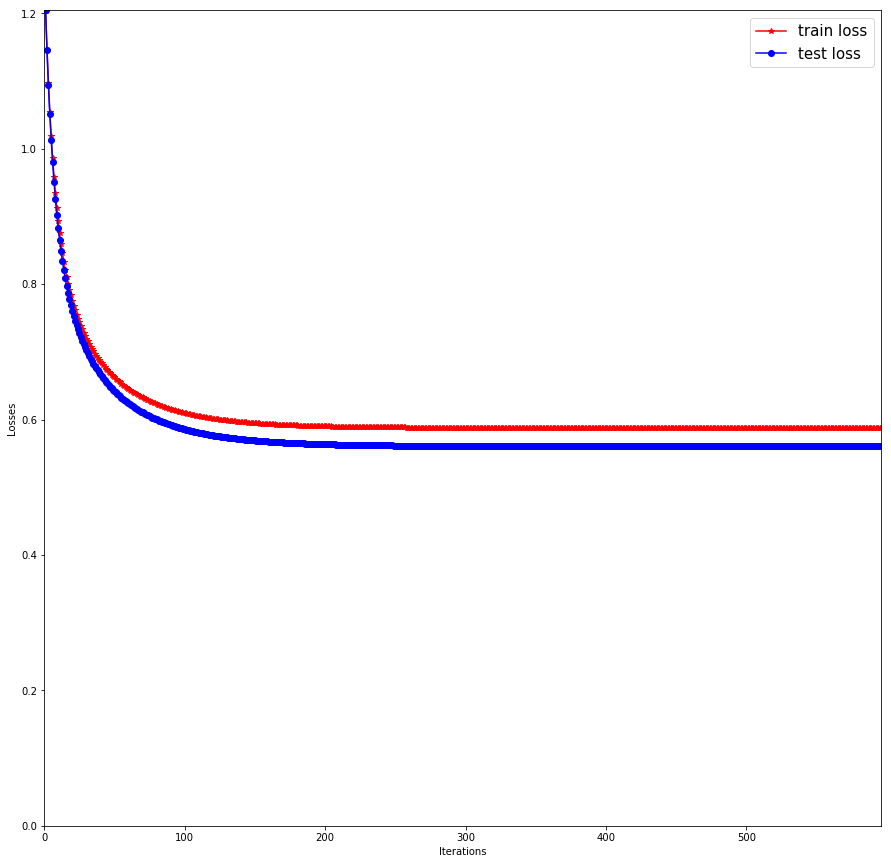

array([[-0.05273687, -0.91772491, -0.84075287],
       [ 0.85816563,  0.17741944, -0.03018282],
       [ 0.02613662,  0.74280195,  0.87660827]])

In [270]:
is_normed=True
theta = BGDWtihEarlyStopping(X_train, y_train, 3, learning_rate=0.1, loss="l2", 
                         t=50, bias=True, tol=1e-5, alpha=0.1, t_size=0.2, verbose_iter=500, norm=is_normed)
theta

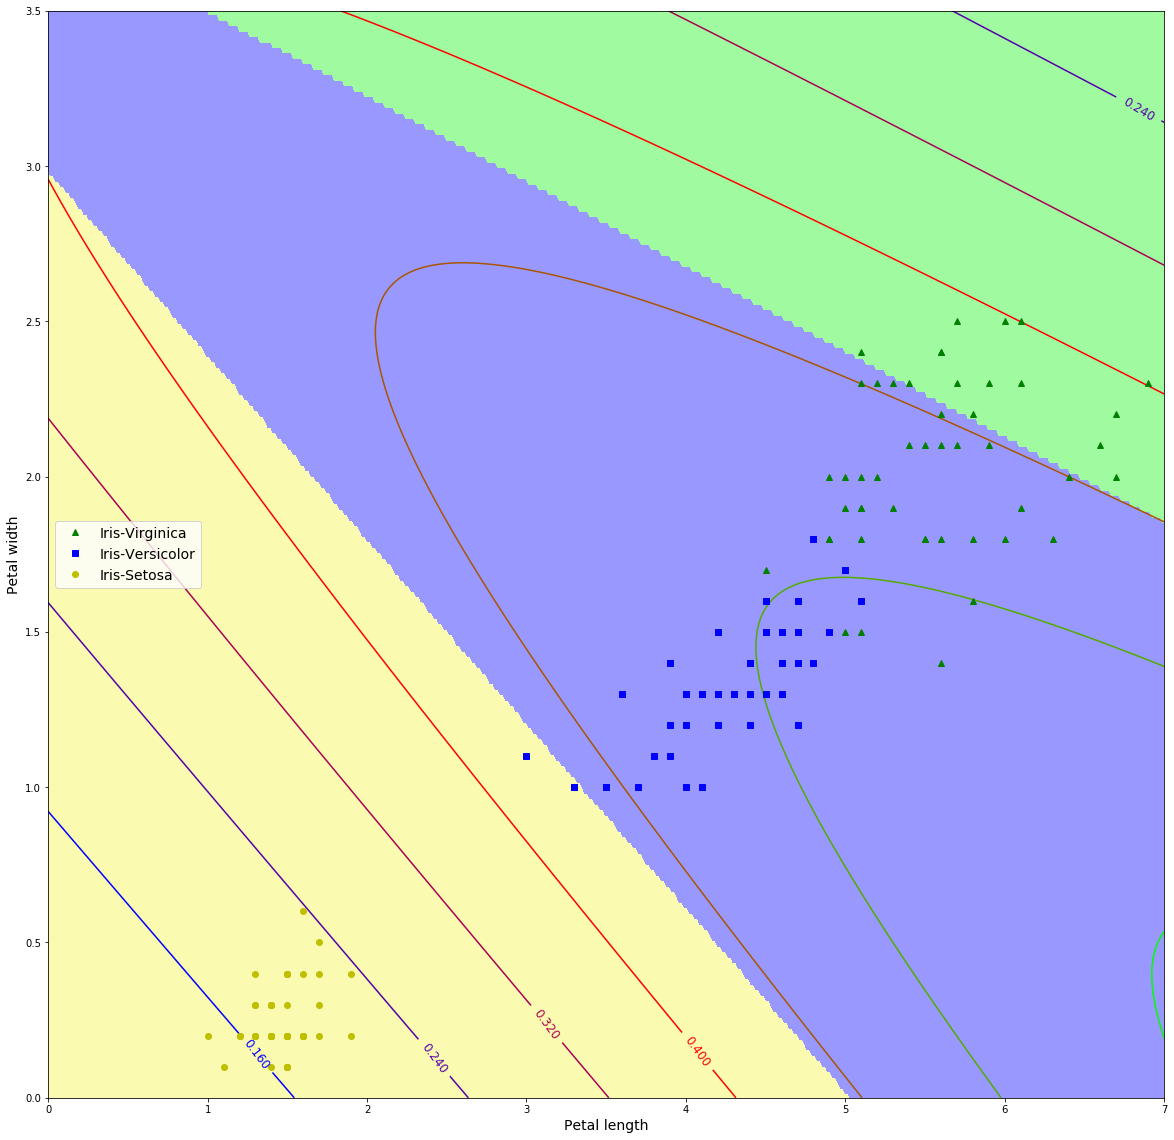

In [271]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

X_new = PrepDataSet(X_new, norm=is_normed)

y_proba = SoftMax(X_new.dot(theta.T))
y_predict = np.argmax(y_proba, axis=1).reshape(-1)


zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(20, 20))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [272]:
X_test_pr = PrepDataSet(X_test, norm=is_normed)

y_pred_score = SoftMax(X_test_pr.dot(theta.T))
y_pred = np.argmax(y_pred_score, axis=1).reshape(-1)

In [273]:
y_pred_score

array([[ 0.80989098,  0.1781496 ,  0.01195941],
       [ 0.12883599,  0.54430473,  0.32685928],
       [ 0.16425699,  0.5362611 ,  0.29948191],
       [ 0.15448675,  0.55610817,  0.28940508],
       [ 0.0357266 ,  0.3870558 ,  0.5772176 ],
       [ 0.03610934,  0.39869949,  0.56519117],
       [ 0.76325804,  0.21785944,  0.01888252],
       [ 0.12095959,  0.5322651 ,  0.34677531],
       [ 0.01106962,  0.2936435 ,  0.69528688],
       [ 0.07581311,  0.48778986,  0.43639703],
       [ 0.13703497,  0.54539261,  0.31757242],
       [ 0.30649322,  0.52738262,  0.16612416],
       [ 0.71533096,  0.25925086,  0.02541818],
       [ 0.82813518,  0.16166106,  0.01020376],
       [ 0.09953219,  0.51402956,  0.38643825],
       [ 0.75774924,  0.22465654,  0.01759422],
       [ 0.82583963,  0.16430251,  0.00985786],
       [ 0.00567086,  0.20778029,  0.78654886],
       [ 0.01574202,  0.29267122,  0.69158676],
       [ 0.81919637,  0.16975371,  0.01104992],
       [ 0.80021451,  0.18684943,  0.012

In [274]:
y_pred

array([0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1])

In [275]:
accuracy_score(y_test, y_pred)

1.0

In [276]:
accuracy = np.mean(y_pred == y_test)
accuracy

1.0

# Fin.